# <center>**Major Project**</center>

## <center>**Machine Learning (COMP8220)**</center>

__`Dataset`__:We are working with the [CelebA dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html), a widely used dataset of celebrity faces. The CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. Images are relatively large data items, so we are provided  a cut-down version of the dataset. It's cut down both in terms of image size, and number of items in the dataset. 

a) The images have been reduced in dimension, now we are dealing with images of 48x48 with 3 colors (48x48x3).

b) The preprocessed dataset has been split into __`train, val and public_test`__ data that is consistent with the standard splits used for CelebA.

We are having data splited into train , validation and public & private test data. The naming conventions of the files can be intrepreted as :

i) X_images.npy -- contains the images as a list of __`48x48x3`__ tensors.

ii) X_labels.npy -- contains the labels as a list of integers from the set {0, 1, 2, 3}. The labels __`[0 1 2 3]`__ correspond to hair colours __`['black', 'blond', 'brown', 'gray'].`__

iii) X_files.npy -- contains the file names of the image files as a list of strings of the form xxxxxx.jpg. where X in the npy filename is one of {train, val, public_test}.  

 

### Mounting the Google drive

All the data has been uploaded to the google drive, below code will mount the drive on the colab for use.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Importing all the required libraries

In [ ]:
import numpy as np                                                                          #Library for reading & processing using Numpy arrays.
import pandas as pd                                                                         #Library for making dataframes for images, file creations
from os.path import join                                                                    #Library for associating dataset stored at particular location.
import matplotlib.pyplot as plt                                                             #Library for displaying plots.
from sklearn.neural_network import MLPClassifier                                            #Library for Multiple Layer Perceptron classifier 
from sklearn.metrics import accuracy_score ,confusion_matrix , classification_report        #Library for generating model metrics.
import tensorflow as tf                                                                     #Library for enabling tensorflow for deep learning
from keras.models import Sequential                                                         #Library for Initializing deep learning model
from tensorflow.keras import layers, models                                                 #Library for layers, model
from keras.utils.np_utils import to_categorical                                             #Library for one-heat- encoding
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization     #Library for importing all layers required
from keras.preprocessing.image import ImageDataGenerator                                    #Library for data augmentation
from keras.callbacks import LearningRateScheduler                                           #Library for learning rate tweaking in callbacks.
from keras.models import load_model                                                         #Library for the loading saved keras model.

Using TensorFlow backend.


Below piece of code has loaded the data from drive to the colab and pre-processed it for the analysis. Here, we have use the reduced image size __`48x48`__ and image files have been reshaped.

In [ ]:
image_size = 48
hair_colours = ['black', 'blond', 'brown', 'gray']
dataset_directory = '/content/drive/My Drive/Image_data/image_dataset'

images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train = np.load(join(dataset_directory, 'train_labels.npy'))

images_val = np.load(join(dataset_directory, 'val_images.npy')) 
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))
files_val = np.load(join(dataset_directory, 'val_files.npy'))

# Public Dataset
images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))

images_train = images_train.reshape([-1, image_size, image_size, 3]) / 255.0
images_val = images_val.reshape([-1, image_size, image_size, 3]) / 255.0
images_test_public = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0


print( "Shape of the training images:" ,images_train.shape)
print( "Shape of the validation images:" , images_val.shape)
print( "Shape of the Public dataset images:",images_test_public.shape)

Shape of the training images: (98479, 48, 48, 3)
Shape of the validation images: (12270, 48, 48, 3)
Shape of the Public dataset images: (11921, 48, 48, 3)


# Visualize the Training Data

We are visualizing the training images with their lables of hairs. We can observe how hairs colors are associated with the images. 

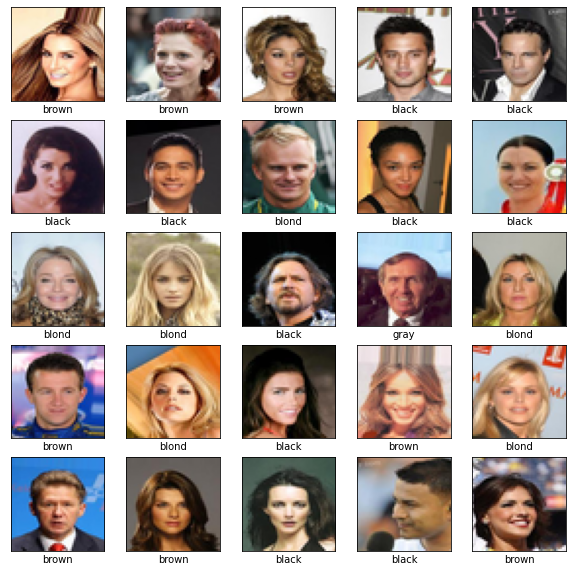

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i], cmap=plt.cm.binary)
    plt.xlabel(hair_colours[labels_train[i]])
plt.show()

# <center>**Conventional Machine Learning**</center>

The conventional ML method for analytical\predictive modeling of datasets include representing the data structure in the model input format, manual feature engineering and selection by including the essential domain knowledge and human perception by analyzing the various attributes of the constituent elements, and applying ML techniques to construct the predictive models. The ML techniques are classified in 4 types: __`Supervised Learning`__ , __`Unsupervised Learning`__ , __`Semi-Supervised Learning`__ & __`Reinforcement Learning`__.

We can observe from the dataset that images have labels from categories __`['black', 'blond', 'brown', 'gray']`__ marked as numeric __`[0 1 2 3]`__. So, we are going to use the conventional classification ML algorithm first.

__*Reshaping the images (train, val & public test) for the Conventional ML*__

In [ ]:
images_train = images_train.reshape(98479, 48*48* 3) 
images_val=images_val.reshape(12270, 48*48*3)
images_test_public=images_test_public.reshape(11921,48*48*3)

* We had tried few conventional classification ML algorithms such as __`Logistic Regression, Naive bayes, K-Nearest Neighbours , SGD classifier`__ and found that their accuracies are not as good as Neural Network with some feature engineering.

* With Naive bayes, the accuracy was around 57%, with KNN it was around 68% , SGD gives 78% accuracy and logistic regression also had the 79% of accurate predictions of hair colors. But, the Neural network with feature engineering gives the best accuracy of 87.0415%. Initially, we had tried NN with 100 iterations it gives an accuracy around 83% then with the increase in the iterations and other hyperparameters tweaking (feature engineering) , best accuracy had been achieved under the Conventional ML algorithm


__*The final Neural Network produced the best predictions for public dataset on Kaggle under the conventional ML algorithm. The score on the validation dataset is `0.870415`.*__

# Neural Network

__`MLP stands for the Multi layer perceptron`__.

The class MLPClassifier implements a multi-layer perceptron (MLP) in which backpropagation used for the training. MLP train on two arrays : array of images ( number of samples , number of features) of dataset & array of labels ( number of samples) which holds the target values. Here, we have 98479 samples for training with same number of labels ({ 0,1,2,3}).

We have implemented MLPClassifier with few hyper-parameter tweakings such as -
tweak iterations, hidden layers, solver.

* __`max_iter`__: It says the maximum number of iterations (default = 200), the solver function iterates until the total number. 

* __`alpha`__: It denotes the L2 penalty - regularization parameter. float, (default=0.0001).

* __`hidden_layer_size`__: The ith element represents the number of neurons in the ith hidden layer.

* __`solver`__: the solver for weight optimization. The lbfgs is an optimizer in the family of quasi-Newton methods. The lbfgs can converge faster and perform better.

*__`We had tried with different iterations (100, 300, 600,800) , solver(adam , lbfgs) and alpha values(1e-05, 1e-08) and reach to the conclusion that the neural network predicts best with 800 iterations , alpha value 1e-05 , solver as lbfgs , hidden layer size as 100 and random state as 42.`__*


In [ ]:
# Model has been initiated with hyper-parameter tweaking
nn_clf=MLPClassifier(max_iter=800, alpha=1e-05,hidden_layer_sizes=(100,),solver="lbfgs",random_state=42)

# Model has been fitted on the training data
nn_clf.fit(images_train,labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=800,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### Accuracy Score

The accuracy score of the NN model is __`87.0415`__.

In [ ]:
score_nn_clf=nn_clf.score(images_val,labels_val)
print("Accuracy score of NN model on Validation set:", score_nn_clf)

Accuracy score of NN model on Validation set: 0.8704156479217604


In [ ]:
y_pred_nn=nn_clf.predict(images_val)
print("Predicted labels of the NN model:", y_pred_nn)

Predicted labels of the NN model: [0 2 2 ... 2 0 0]


### Analysis of the Results using Confusion Matrix & Classification Report

The __`precision`__ is the ratio of the correctly predicted positive obseravtions to the predicted positive observations.

The __`recall`__ is the ratio of the correctly predicted positive observations to the all observations in actual class.

The __`f1`__ score is the harmonic mean of the precision & recall.

We observe the below points from the Neural Network model:

* __`Class 0 (black)`__ - NN model has predicted 3675 correct predictions out of 4007. The precision is 0.86 , recall is 0.92 and harmonic mean is 0.89.

* __`Class 1 (blond)`__ - NN model has predicted 2551 correct predictions out of 2852. The precision is 0.90 , recall is 0.89 and harmonic mean is 0.90.

* __`Class 2 (brown)`__ - NN model has predicted 3715 correct predictions out of 4507. The precision is 0.87 , recall is 0.82 and harmonic mean is 0.85.

* __`Class 3 (gray)`__ - NN model has predicted 739 correct predictions out of 904. The precision is 0.84 , recall is 0.82 and harmonic mean is 0.83.

We can say that the Conventional ML (NN) model highly correctly predicted class 0 & class 1.

In [ ]:
Y_pred_classes_nn = (y_pred_nn)
Y_true_classes_nn = (labels_val)
target_names = ["Class {}".format(i) for i in range(4)]
print(classification_report(Y_true_classes_nn, Y_pred_classes_nn, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.92      0.89      4007
     Class 1       0.90      0.89      0.90      2852
     Class 2       0.87      0.82      0.85      4507
     Class 3       0.84      0.82      0.83       904

    accuracy                           0.87     12270
   macro avg       0.87      0.86      0.86     12270
weighted avg       0.87      0.87      0.87     12270



In [ ]:
print("Confusion Matrix of NN Model:\n", confusion_matrix(Y_true_classes_nn, Y_pred_classes_nn))

Confusion Matrix of NN Model:
 [[3675   14  286   32]
 [  16 2551  229   56]
 [ 546  193 3715   53]
 [  47   66   52  739]]


In [ ]:
y_pred_pub_nn=nn_clf.predict(images_test_public)
print(" Predicted labels (Public dataset) of the NN Model:", y_pred_pub_nn)

 Predicted labels (Public dataset) of the NN Model: [0 2 0 ... 0 0 1]


----------------------------------------

# <center>**Deep Machine Learning**</center>

Deep learning is a subcategory of machine learning in __`artificial intelligence (AI)`__ that has networks efficient of learning unsupervised from data that is unstructured or unlabelled. Deep Learning is becoming a very popular subset of machine learning due to its high level of performance across many types of data. A great way to use deep learning to classify images is to build a convolutional neural network (CNN). The Keras library in Python makes it pretty simple to build a CNN.

__*The Below Sequential fully connected dense Deep ML model has the best accuracy for public dataset on Kaggle under the Deep ML algorithm. The score on the validation dataset is `0.927` and score on public dataset is `0.93909` (submitted on kaggle).*__

### One - hot encoding

We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a variable is inputted for each category. For example,if an image in the dataset has __`brown color hair (class 2)`__. This means that the third number in our array will have a 1 and the rest of the array will be filled with 0.

In [ ]:
labels_train = to_categorical(labels_train)
labels_val = to_categorical(labels_val)

In [ ]:
labels_train[0]

array([0., 0., 1., 0.], dtype=float32)

__*Reshaping the training, validation & public test data to 4D.*__

In [ ]:
images_train = images_train.reshape(98479, 48,48, 3) 
images_val=images_val.reshape(12270, 48,48,3)
images_test_public=images_test_public.reshape(11921,48,48,3)

### Data Augmentation


This is a way to signficantly increase the diversity of the data without gathering the new data. The common data augmentation techniques are cropping, padding, zooming, flipping , width range, height range.

We are creating datagen with the data augmentation technquies,here we are rotating the image to 15 degree along with a zoom of 0.10, shifting the width & height range up to 0.2 enabling the horizontal flip false with featurewise_center & featurewise_std_normalization false as well. Data Augmentation has been used for increasing the prediction ability of our model with diverse images .

We had tried with other values as well such as rotation as 10, 20,30 along with the different zoom range of 0.03,0.2, 0.6 , horizontal flip as True and in the end we reached to the conclusion that with the rotation range 15, zoom as 0.1, shifitng of height & width by 0.2 units and keeping the flips as false; we get the best accuracy.

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,                       # set input mean to 0 over the dataset
        featurewise_std_normalization=False,            # divide inputs by std of the dataset
        zca_whitening=False,                            # apply ZCA whitening, here it is false
        rotation_range=0.15,                            # randomly rotate images in the range 0.15
        zoom_range = 0.1,                               # randomly zoom image by 0.1
        width_shift_range=0.2,                          # randomly shift images horizontally by 0.2 (fraction of total width)
        height_shift_range=0.2,                         # randomly shift images vertically by 0.2 (fraction of total height)
        horizontal_flip=False,                          # randomly horizaontally flip the images: false
        vertical_flip= False)                           # randomly vertically flip images :false

### Building the model

In a deep learning model we have below parameters:

* __`filters`__: number of the required feature maps.

* __`kernel_size`__: size of the convolutional kernel. (size 3 means 3x3).

* __`strides`__: This means the new layer would have same size equal to the previous layer that are already mapped divided by the strides. (default strides =1).

* __`padding`__:The pading could have two values either valid or same. If we have used padding as valid then the size of the next layer is reduced by kernel_size-1 , for instance if we have 5x5 convolution on 48x48 image(maps) with *padding =valid* then the next layer would maps of size 44x44. But with the use of *padding = same*, the size will not reduced. So, in our case for the next layer size of image won't reduced.

* __`activation`__: This is the activation function for the layer. We are using the Relu ~ __`Rectified Linear Activation`__. This function used for the forward propogation.

The __`Conv2D`__ layers deal with the input images which are seen as 2D matrices.

The __`BatchNormalization`__ has been used because a convolution layer with strides =1 (default value) pursued by max pooling delivers more or less similar results as a convolution layer with strides =2. This approach performs twice as more calculations and therefore, provides a faster result.

The __`dropout`__ layers are mainly used to prevent model from the overfitting and reduces the loss. We can observe the effect of dropout layer in the loss of the model in the results section below.

In between the BatchNormalization and the dense layer, we have __`Flatten`__ layer which serves as the connection between the convolutional and dense layers.

The __`dense`__ layer act as the output layer, we have 4 classes to predict (0,1,2,3) so we have 4 in the last layer followed by the __`softmax`__ activation function.

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (48, 48, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu' ))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))

__*Model summary shows the layers distribution with their output shapes & parameters.*__

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)       

Model has been created , now we are compiling the model. For the compiling we are providing the three parameter such as :

* __`optimizer`__: this controls the learning rate, we are using "adam" which is a good optimizer for many case. This adjusts the learning rate throughout the training of the model.

* __`loss`__: Our data is one-heat encoded and we have 4 classes to predict so, categorical crossentropy is the best choice.

* __`metrics`__: to evaluate the model performance, accuracy metrics has been used.

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

*Decreasing the learning rate with every epoch. For each epoch,callbacks function called during the training of the model.*

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

### Training the Model

For the training, we have used the fit_generator() function with various parameters. We have initialised the augmentation in previous steps and here we are applying th augmentation function on our training data with a batch_size =64. 

* __`Epochs`__: We have used 45 epochs for the model training and accuracy of validation data. It means our model will complete 45 times the cycle.

* __`steps_per_epoch`__:Total number of steps (batches of samples) to produce from generator beforehand stating one epoch completed and beginning the later epoch. We have used the shape[0] of the trainig data divided by the batch_size (64).

* __`callbacks`__:It is an  object that can execute acts at different stages of training (e.g. at the beginning or end of an epoch, prior to or later a single batch, etc). Here, we used it for decreasing the learning rate.

In [ ]:
hist = model.fit_generator(datagen.flow(images_train, labels_train, batch_size=64),
                           steps_per_epoch = images_train.shape[0]//64,
                           epochs=45, 
                           verbose=1, 
                           validation_data=(images_val,labels_val),
                           callbacks=[annealer])

Epoch 1/45
1538/1538 [==============================] - 75s 49ms/step - loss: 0.6909 - accuracy: 0.7568 - val_loss: 0.2797 - val_accuracy: 0.8243
Epoch 2/45
1538/1538 [==============================] - 74s 48ms/step - loss: 0.4375 - accuracy: 0.8432 - val_loss: 2.2968 - val_accuracy: 0.8135
Epoch 3/45
1538/1538 [==============================] - 76s 49ms/step - loss: 0.3710 - accuracy: 0.8675 - val_loss: 0.3522 - val_accuracy: 0.8553
Epoch 4/45
1538/1538 [==============================] - 77s 50ms/step - loss: 0.3384 - accuracy: 0.8783 - val_loss: 0.3440 - val_accuracy: 0.8968
Epoch 5/45
1538/1538 [==============================] - 76s 49ms/step - loss: 0.3262 - accuracy: 0.8835 - val_loss: 0.3854 - val_accuracy: 0.8907
Epoch 6/45
1538/1538 [==============================] - 75s 49ms/step - loss: 0.2966 - accuracy: 0.8929 - val_loss: 0.3114 - val_accuracy: 0.8905
Epoch 7/45
1538/1538 [==============================] - 75s 49ms/step - loss: 0.2830 - accuracy: 0.8962 - val_loss: 0.3654 -

## Results

We have reach an accuracy of 92.7% (~ 93%) with a loss of 20.7% , this means we are making 93% accurate predictions for the validation data set. Also, the loss between the prediction and actual value of wrong predictions is near abour 20.7%.

In [ ]:
score_dp = model.evaluate(images_val, labels_val, verbose=0)
loss_score_dp = score_dp[0]
accuracy_score_dp = score_dp[1]
print('Validation loss of the DP model:', score_dp[0])
print('Validation accuracy of the DP model:', score_dp[1]) 

Validation loss of the DP model: 0.20781514371617013
Validation accuracy of the DP model: 0.92722088098526


### Analysis of the Results using Confusion Matrix & Classification Report

The __`precision`__ is the ratio of the correctly predicted positive obseravtions to the predicted positive observations.

The __`recall`__ is the ratio of the correctly predicted positive observations to the all observations in actual class.

The __`f1`__ score is the harmonic mean of the precision & recall.

We observe the below points from Deep Model:

* __`Class 0 (black)`__ - Deep model has predicted 3801 correct predictions out of 4007. The precision is 0.93 , recall is 0.95 and harmonic mean is 0.94.

* __`Class 1 (blond)`__ - Deep model has predicted 2700 correct predictions out of 2852. The precision is 0.93 , recall is 0.95 and harmonic mean is 0.94.

* __`Class 2 (brown)`__ - Deep model has predicted 4051 correct predictions out of 4507. The precision is 0.92 , recall is 0.90 and harmonic mean is 0.91.

* __`Class 3 (gray)`__ - Deep model has predicted 825 correct predictions out of 904. The precision is 0.93 , recall is 0.91 and harmonic mean is 0.92.

We can say that the Deep ML model highly correctly predicted class 0 & class 1.

In [ ]:
y_pred_dp = model.predict(images_val)
 
Y_pred_classes = np.argmax(y_pred_dp, axis = 1) # Convert predictions classes to one hot vectors
Y_true_classes = np.argmax(labels_val, axis = 1)
target_names = ["Class {}".format(i) for i in range(4)]
print(classification_report(Y_true_classes, Y_pred_classes, target_names=target_names)) 

              precision    recall  f1-score   support

     Class 0       0.93      0.95      0.94      4007
     Class 1       0.93      0.95      0.94      2852
     Class 2       0.92      0.90      0.91      4507
     Class 3       0.93      0.91      0.92       904

    accuracy                           0.93     12270
   macro avg       0.93      0.93      0.93     12270
weighted avg       0.93      0.93      0.93     12270



In [ ]:
 print("Confusion Matrix of DP Model:\n", confusion_matrix(Y_true_classes, Y_pred_classes))

Confusion Matrix of DP Model:
 [[3801    6  183   17]
 [   3 2700  130   19]
 [ 270  159 4051   27]
 [  14   34   31  825]]


*From the below graphs we observe that the model is not overfitting in between due to the use of dropout layers as in the beginning validation loss was very high but later on, it follows a zig-zag pattern (upward-downward pattern but not significant). Whereas, in terms of the validation accuracy it increase after the 3rd-4th epoch.*

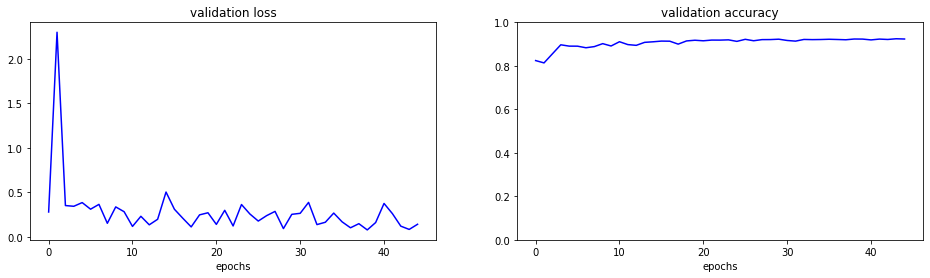

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(hist.history["val_loss"] , color="blue" , label= "Val loss")
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(hist.history["val_accuracy"], color="blue" , label= "Val Accuracy")
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

__*This model has the best accuracy for public dataset on Kaggle under the Deep ML algorithm. The score on the validation dataset is `0.9272` and on the public dataset is `0.93909`*__

# Comparison Between the Conventional ML & Deep ML Model results

__*We have observed a 5+% hike in the validation accuracy from 87.04%  in conventional machine learning (neural network) to 92.7% in deep learning model*__. 

| Model         | Class         | Precision   | Recall | F1 score|
|---------------|---------------|-------------|--------|---------|
|Conventional ML| Class 0       |0.86         |0.92    |0.89     |
|               | Class 1       |0.90         |0.89    |0.90     |
|               | Class 2       |0.87         |0.82    |0.85     |
|               | Class 3       |0.84         |0.82    |0.83     |
|---------------|---------------|-------------|--------|---------|
|Deep  ML       | Class 0       |0.93         |0.95    |0.94     |
|               | Class 1       |0.93         |0.95    |0.94     |
|               | Class 2       |0.92         |0.90    |0.91     |
|               | Class 3       |0.93         |0.91    |0.92     |

From the classification reports of these models, we observe below points:


* Conventional model has best predicted class 0(black) and Deep ML as well because we have highest samples of this class. Although, Conventional ML poorly make predictions for class 3(gray) of 739 correct predictions but Deep learning predicts class 3(gray) with correct 825 predictions out of 914.

* The loss for the Deep machine learning is very low as well (0.207%).

* Conventional ML predicts 286 images of class 0(black) as class 2(brown) whereas Deep ML predicts just 183 class 0 images as class 2. Similarly, we have observed same pattern for other classes as well.


*(Deep ML is optimised, more accurate, less loss and faster as well than the Conventional ML)*

In [ ]:
table = {'' : ["Conventioanl Model(NN)" ,"Deep learning Model"], 'Validation Accuracy': [score_nn_clf , accuracy_score_dp]}
df = pd.DataFrame(data=table)
df

,,Validation Accuracy
0,Conventioanl Model(NN),0.870416
1,Deep learning Model,0.927221


## Saving & Loading the model

__*Saving the model on the google drive for the reusability*__.

In [ ]:
path = "/content/drive/My Drive/Model/Model_Image_classification" 
model_path = path + "-" +  ".h5" 
print(f"Saving model to: {model_path}...")
model.save(model_path)

Saving model to: /content/drive/My Drive/Model/Model_Image_classification-.h5...


__*loading the saved model from the google drive & make predictions for the public dataset & private dataset*__.

In [ ]:
path = "/content/drive/My Drive/Model/Model_Image_classification" 
model_path = path + "-" +  ".h5" 
model = load_model(model_path)
print("loading the saved model form the google drive:", model)

loading the saved model form the google drive: <keras.engine.sequential.Sequential object at 0x7f7171547748>


# <center>**File Creation**</center>

Predicted labels are exported in a csv file for the public dataset & private data set as well on the google drive and later on submitted on the Kaggle for the  public & private score respectively.

## Public Dataset

*making predictions for the public dataset from the deep learning model*

In [ ]:
predictions_pub = model.predict(images_test_public) 
pred_labels_pub = np.argmax(predictions_pub, axis = 1)
pred_labels_pub

array([0, 2, 0, ..., 0, 0, 1])

*Creating a file of predicted labels with ID from the public test data file & predictions for the public dataset*

In [ ]:
df=pd.DataFrame({"ID":files_test_public, "Prediction" : pred_labels_pub})
pred=df.to_csv('/content/drive/My Drive/Image_data/image_dataset/4581713-Public-deep.csv' ,index =False) 

__*`The Deep machine learning model produced the 93.909% accurate predictions on the public dataset (submitted on kaggle).`*__

## Private Dataset

Reading the private dataset and reshaping it as well.

In [ ]:
images_test_private = np.load(join(dataset_directory, 'test_private_images.npy'))
test_private_files =np.load(join(dataset_directory, 'test_private_files.npy'))

images_test_private = images_test_private.reshape([-1, image_size, image_size, 3]) / 255.0

print(images_test_private.shape)

(13143, 48, 48, 3)


*Visualising the Private test data*

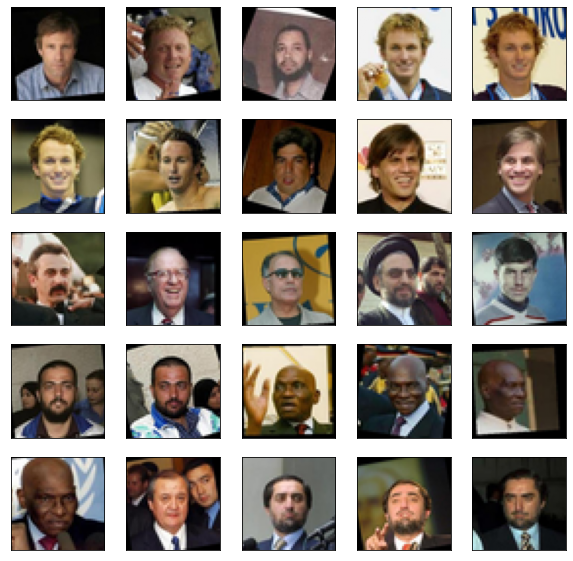

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_test_private[i], cmap=plt.cm.binary)
plt.show()

*making predictions for the private dataset from the deep learning model*

In [ ]:
predictions_pri = model.predict(images_test_private)  

pred_labels_pri = np.argmax(predictions_pri, axis = 1)
pred_labels_pri

array([2, 1, 0, ..., 0, 3, 0])

*Creating a file of predicted labels with ID from the private test data file & predictions for the private dataset*

In [ ]:
df=pd.DataFrame({"ID":test_private_files, "Prediction" : pred_labels_pri})
pred=df.to_csv('/content/drive/My Drive/Image_data/image_dataset/4581713-Private-deep.csv' ,index =False) 

__*`The Deep machine learning model produced the 62.383% accurate predictions on the private dataset (submitted on kaggle).`*__

----------

# <center>**Conclusion**</center>

We have constructed two models: Neural Network from the Conventional ML category & a fully connected dense model with NN layers. We observe that the neural network have the accuracy of 87.04% of the hair colors prediction of the celebrities from the CelebA dataset. Whereas, the Deep ML fully connected dense model reach the validation accuracy of 93% (92.7%) with a loss of just over 0.20 (0.207%).

__*`The deep learning model ranked #2 out of 56 submissions with accuracy 0.93909 on the public test set, with the top-performing system having 0.93935 accuracy.`*__

For the best Neural Network under the Conventional ML algorithms, we had tweaked the iterations, hidden layer size , solver as well. For the Deep ML fully connected dense model ,We had tweaked the parameters such as epoch size, augmentation, batch_size , learning rate.

We had used the confusion matrix & classification report along with the accuracy score to measure the performance of our models. 

* Deep Machine learning model performs very good on public dataset with a score of __`93.909`__ because we had tweaked our parameters (feature engineering) according to the validation dataset which is the subset of whole dataset (CelebA dataset) and the public test data is also a subset of the CelebA dataset. Secondly, the features of the training , valdiation & public test set were similar.

* On the other hand, we had observed the accuracy of __`62.383`__ on the unseen dataset (private test data) because we had created our model according to the training & validation data. The features in the training & validation set are entirely similar to the public dataset so fully connected model had 93.909% accuracy but maybe the private dataset features are different from them. The fully connected dense model learns from the training data and here it seems the private data set is different from the training data. We had checked the private data set images and found that there are few bald images as well.

*__`Deep Machine learning fully connected dense model shows much faster and accurate results`__*.